## `im.db` Data Base Data Cleaning

In [1]:
# Import the necessary libraries
import sqlite3
import pandas as pd

- **Connecting to SQLite Database:** Establishe a connection to an SQLite database stored in the file named "im.db". The `sqlite3.connect()` function returns a connection object that allows interaction with the database.

- **Reading Data from CSV:** Read data from a CSV file named "bom.movie_gross.csv" and stores it in the DataFrame `bomdf`.

In [2]:
# Connecting to SQLite Database
conn = sqlite3.connect('./Data/im.db')
# Reading Data from CSV
bomdf = pd.read_csv("./Data/bom.movie_gross.csv")

- Retrieve information about the database schema from the `sqlite_master` table. It includes details about tables, views, and other database objects. 

In [3]:
query = """
    SELECT *
    FROM sqlite_master;
"""
pd.read_sql(query, conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Retrieve data from three tables (`movie_basics`, `movie_ratings`, and `movie_akas`) using SQL joins.

1. **Tables Involved:**
   - `movie_basics`: Contains information about movie titles, release years, runtime, and genres.
   - `movie_ratings`: Includes average ratings and the number of votes for each movie.
   - `movie_akas`: Provides additional details such as alternative titles, regions, languages, and attributes.

2. **SQL Query:**
   - The query combines data from these tables using `JOIN` operations based on the common column 'movie_id'.
   - It selects specific columns from each table.

3. **Result:**
   - The retrieved data is stored in the DataFrame 'imdf'.

In [4]:
query = """    
    SELECT  mb.movie_id, mb.primary_title, mb.original_title, mb.start_year, mb.runtime_minutes, mb.genres, 
            mr.averagerating, mr.numvotes, 
            ma.ordering, ma.title, ma.region, ma.language, ma.types, ma.attributes, ma.is_original_title
    FROM movie_basics AS mb
        JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        JOIN movie_akas AS ma
            ON mb.movie_id = ma.movie_id
"""
imdf = pd.read_sql(query, conn)

Will use `info()` method to get information about the `imdf` Data Frame. Here's a brief summary of the columns:

1. `movie_id`: Unique identifier for each movie.
2. `primary_title`: The primary title of the movie.
3. `original_title`: The original title of the movie.
4. `start_year`: The year when the movie was released.
5. `runtime_minutes`: Duration of the movie in minutes.
6. `genres`: Genre(s) associated with the movie.
7. `averagerating`: Average rating given to the movie.
8. `numvotes`: Number of votes/ratings received by the movie.
9. `ordering`: An ordering quantity of the movies.
10. `region`: The region where the movie is relevant.
11. `language`: Language(s) in which the movie is available.
12. `is_original_title`: Indicates whether the title is the original one.

In [5]:
imdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261806 entries, 0 to 261805
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           261806 non-null  object 
 1   primary_title      261806 non-null  object 
 2   original_title     261806 non-null  object 
 3   start_year         261806 non-null  int64  
 4   runtime_minutes    250553 non-null  float64
 5   genres             260621 non-null  object 
 6   averagerating      261806 non-null  float64
 7   numvotes           261806 non-null  int64  
 8   ordering           261806 non-null  int64  
 9   title              261806 non-null  object 
 10  region             218341 non-null  object 
 11  language           37080 non-null   object 
 12  types              153268 non-null  object 
 13  attributes         12924 non-null   object 
 14  is_original_title  261806 non-null  float64
dtypes: float64(3), int64(3), object(9)
memory usage: 30

Checking for missing values (nulls) in your DataFrame:

1. `runtime_minutes`: There are 11,253 missing values.
2. `genres`: There are 1,185 missing values.
3. `region`: There are 43,465 missing values.
4. `language`: There are 224,726 missing values.
5. `types`: There are 108,538 missing values
6.  `attributes`: There are 248,882 missing values

In [6]:
imdf.isnull().sum()

movie_id                  0
primary_title             0
original_title            0
start_year                0
runtime_minutes       11253
genres                 1185
averagerating             0
numvotes                  0
ordering                  0
title                     0
region                43465
language             224726
types                108538
attributes           248882
is_original_title         0
dtype: int64

Calculating the missing value percentages for each column in the Data Frame:

- `movie_id`, `primary_title`, `original_title`, `is_original_title`, `start_year`, and `averagerating` have no missing values (0%).
- `runtime_minutes` has 4.3% missing values.
- `genres` has 0.45% missing values.
- `region` has 16.6% missing values.
- `language` has 85.8% missing values.
- `types` has 41.5% missing values.
- `attributes` has 95.1% missing values.

In [7]:
imdf.isnull().sum() / len(imdf) *  100

movie_id              0.000000
primary_title         0.000000
original_title        0.000000
start_year            0.000000
runtime_minutes       4.298221
genres                0.452625
averagerating         0.000000
numvotes              0.000000
ordering              0.000000
title                 0.000000
region               16.601988
language             85.836841
types                41.457415
attributes           95.063520
is_original_title     0.000000
dtype: float64

Define a Python function `drop_columns_with_missing_values` that does the following:

1. Calculates the percentage of missing values for each column in a DataFrame.
2. Identifies columns with missing values exceeding the specified threshold (in this case, 10%).
3. Drops those columns from the DataFrame.

The resulting `imdf` will have columns removed if their missing values exceed the threshold.

In [8]:
import pandas as pd

def drop_columns_with_missing_values(df, threshold=0.1):
    # Calculate the percentage of missing values for each column
    missing_percent = df.isnull().mean()
    
    # Identify columns with missing values above the threshold
    columns_to_drop = missing_percent[missing_percent >= threshold].index
    
    # Drop the columns
    cleaned_df = df.drop(columns=columns_to_drop)
    
    return cleaned_df

imdf = drop_columns_with_missing_values(imdf, threshold=0.1)

In [9]:
imdf.isnull().sum() / len(imdf) *  100

movie_id             0.000000
primary_title        0.000000
original_title       0.000000
start_year           0.000000
runtime_minutes      4.298221
genres               0.452625
averagerating        0.000000
numvotes             0.000000
ordering             0.000000
title                0.000000
is_original_title    0.000000
dtype: float64

Define Python function `impute_missing_values` that imputes missing values in a DataFrame based on column data types:

1. Separate columns into numeric and categorical types.
2. Impute missing values in numeric columns with the mean.
3. Impute missing values in categorical columns with the mode (most frequent value).
4. Apply the function to your DataFrame `imdf` to handle missing values.

In [10]:
import pandas as pd

def impute_missing_values(df):
    # Separate columns by data type
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    # Impute numeric columns with mean
    for col in numeric_cols:
        df[col] = df[col].fillna(df[col].mean())
    
    # Impute categorical columns with mode
    for col in categorical_cols:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df
imdf = impute_missing_values(imdf)

Checking for missing value percentages for each column in the dataset:

- `movie_id`, `primary_title`, `original_title`, `start_year`, `runtime_minutes`, `genres`, `averagerating`, `numvotes`, `ordering`, `title`, and `is_original_title` have **no missing values** (0%).

In [11]:
imdf.isnull().sum() / len(imdf) *  100

movie_id             0.0
primary_title        0.0
original_title       0.0
start_year           0.0
runtime_minutes      0.0
genres               0.0
averagerating        0.0
numvotes             0.0
ordering             0.0
title                0.0
is_original_title    0.0
dtype: float64

Is the unique identifier column (`movie_id`) unique? If not what is the sum of duplicates?
- The `movie_id` is **not unique** because there are **192,229** duplicate entries in the dataset.

In [12]:
# Checking if the unique identifier `movie_id` is unique
isunique = imdf['movie_id'].is_unique

# Calculating the sum of duplicates
sumofduplicates = imdf.duplicated('movie_id').sum()

print(f"Is movie_id unique? {isunique}")
print(f"Sum of duplicates: {sumofduplicates}")

Is movie_id unique? False
Sum of duplicates: 192229


Checking out the first 10 rows of duplicate entries in the `movie_id` column. These duplicates have similar titles, years, genres, and other attributes.

In [13]:
imdf[imdf.duplicated('movie_id')].head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,is_original_title
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,2,Sunghursh,1.0
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,3,Sunghursh,0.0
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,4,Sunghursh,0.0
4,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,5,Sungharsh,0.0
6,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,2,Ashad Ka Ek Din,0.0
7,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,3,One Monsoon Day,0.0
8,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,4,Ashad Ka Ek Din,1.0
10,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,2,The Other Side of the Wind,0.0
11,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,3,The Other Side of the Wind,0.0
12,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,4,L'altra faccia del vento,0.0


Droping duplicate rows in the DataFrame based on the `movie_id` column.
1. Use `imdf.drop_duplicates(subset=['movie_id'])` to remove duplicate rows based on the unique identifier (`movie_id`).
2. Check if any duplicates remain using `imdf[imdf.duplicated('movie_id')].head(10)`.

In [14]:
# Drop duplicates based on 'movie_id'
imdf = imdf.drop_duplicates(subset=['movie_id'])

# Check for anymore duplicates
imdf[imdf.duplicated('movie_id')].head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ordering,title,is_original_title


- Rounding off the 'runtime_minutes' column to two decimal places. To ensures that the runtime values are concise and easier to work with.
- Displays the first few rows of the modified column.

In [15]:
# Rounding off into two decimal places
imdf['runtime_minutes'] = imdf['runtime_minutes'].round(2)
imdf['runtime_minutes'].head()

0     175.00
5     114.00
9     122.00
22    100.11
25     80.00
Name: runtime_minutes, dtype: float64

Check a summary of statistical information for the `runtime_minutes` column.

- `count`: The total number of non-missing values in the column.
- `mean`: The average runtime in minutes.
- `std`: The standard deviation, indicating the variability of runtime values.
- `min`: The minimum runtime value.
- `25%`, `50%`, and `75%`: The quartiles (25th, 50th, and 75th percentiles) of the data.
- `max`: The maximum runtime value.

In [16]:
imdf['runtime_minutes'].describe()

count    69577.00000
mean        95.17542
std        203.37579
min          3.00000
25%         83.00000
50%         93.00000
75%        101.00000
max      51420.00000
Name: runtime_minutes, dtype: float64

Filter the `imdf` DataFrame to include only rows where the `runtime_minutes` fall within the range of 40 to 200 minutes. This ensures that you're working with movies that have reasonable runtime durations.

In [17]:
# Filtering to a range of 40 to 200 minute
imdf = imdf[(imdf['runtime_minutes'] >= 40) & (imdf['runtime_minutes'] <= 200)]

Creating a box plot of the `runtime_minutes` column.

The `boxplot` function generates a box plot for the 'runtime_minutes' data. The vertical (`vert=True`) orientation shows the distribution of runtime values.

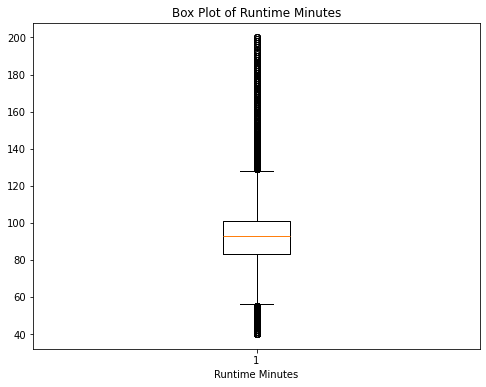

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(imdf['runtime_minutes'], vert=True)
plt.xlabel('Runtime Minutes')
plt.title('Box Plot of Runtime Minutes')
plt.show()

In [19]:
imdf['genres'].value_counts().head()

genres
Drama           11546
Documentary      9179
Comedy           5155
Comedy,Drama     2502
Horror           2465
Name: count, dtype: int64

Creating binary columns (genre indicators) based on the unique genres in the `genres` column.

1. **Extract Unique Genres:**
   - Split the column into individual genres using `.str.split(',')` and then explode the resulting list to get unique genre values.

2. **Create Binary Columns:**
   - For each unique genre, check if that genre is present in the original column using `.str.contains(genre)`.
   - The result is converted to 1 (if the movie belongs to that genre) or 0 (otherwise).

In [20]:
unique_genres = imdf['genres'].str.split(',').explode().unique()

for genre in unique_genres:
    imdf[f'is_{genre}'] = imdf['genres'].str.contains(genre).astype(int)

- Convert the `averagerating` column to integer data type (removing any decimal places). To ensure that the ratings are represented as whole numbers (integers).

- The `.describe()` method provides summary statistics for the modified column. It includes count, mean, standard deviation, minimum, quartiles, and maximum.

In [21]:
imdf['averagerating'] = imdf['averagerating'].astype('int')
imdf['is_original_title'] = imdf['is_original_title'].astype('int')
imdf['numvotes'] = imdf['numvotes'].astype('int')
imdf[['averagerating', 'is_original_title', 'ordering', 'numvotes']].describe()

,averagerating,is_original_title,ordering,numvotes
count,69171.000000,69171.000000,69171.0,6.917100e+04
mean,5.863946,0.145234,1.0,3.755296e+03
std,1.484655,0.352339,0.0,3.128829e+04
min,1.000000,0.000000,1.0,5.000000e+00
25%,5.000000,0.000000,1.0,1.500000e+01
50%,6.000000,0.000000,1.0,5.400000e+01
75%,7.000000,0.000000,1.0,3.130000e+02
max,10.000000,1.000000,1.0,1.841066e+06


Permanently drop the columns `primary_title`, `original_title`, and `title` from the DataFrame.

In [22]:
imdf.drop(['primary_title', 'original_title', 'title'], axis=1, inplace=True)

## Gladwell (Replace with the name of your file)

## Monica (Replace with the name of your file)

## Kelvin (Replace with the name of your file)